#Load Data

In [ ]:
import pandas as pd

dataset = pd.read_csv('/content/CNN_Articels_clean.csv')

#Exploratory Data Analysis

In [ ]:
print('Shape: ', dataset.shape)

Shape:  (4076, 11)


In [ ]:
print('Columns: ', dataset.columns)

Columns:  Index(['Index', 'Author', 'Date published', 'Category', 'Section', 'Url',
       'Headline', 'Description', 'Keywords', 'Second headline',
       'Article text'],
      dtype='object')


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4076 entries, 0 to 4075
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Index            4076 non-null   int64 
 1   Author           4076 non-null   object
 2   Date published   4076 non-null   object
 3   Category         4076 non-null   object
 4   Section          4076 non-null   object
 5   Url              4076 non-null   object
 6   Headline         4076 non-null   object
 7   Description      4076 non-null   object
 8   Keywords         4076 non-null   object
 9   Second headline  4076 non-null   object
 10  Article text     4076 non-null   object
dtypes: int64(1), object(10)
memory usage: 350.4+ KB


In [ ]:
dataset['Author'] = dataset['Author'].astype('string')
dataset['Date published'] = dataset['Date published'].astype('datetime64[ns]')
dataset['Category'] = dataset['Category'].astype('category')
dataset['Section'] = dataset['Section'].astype('category')
dataset['Url'] = dataset['Url'].astype('string')
dataset['Headline'] = dataset['Headline'].astype('string')
dataset['Description'] = dataset['Description'].astype('string')
dataset['Keywords'] = dataset['Keywords'].astype('string')
dataset['Second headline'] = dataset['Second headline'].astype('string')
dataset['Article text'] = dataset['Article text'].astype('string')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4076 entries, 0 to 4075
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Index            4076 non-null   int64         
 1   Author           4076 non-null   string        
 2   Date published   4076 non-null   datetime64[ns]
 3   Category         4076 non-null   category      
 4   Section          4076 non-null   category      
 5   Url              4076 non-null   string        
 6   Headline         4076 non-null   string        
 7   Description      4076 non-null   string        
 8   Keywords         4076 non-null   string        
 9   Second headline  4076 non-null   string        
 10  Article text     4076 non-null   string        
dtypes: category(2), datetime64[ns](1), int64(1), string(7)
memory usage: 296.2 KB


#Handle missing data

In [ ]:
print("Null Values: ", dataset.isnull().sum())
#dataset.dropna(inplace=True)

Null Values:  Index              0
Author             0
Date published     0
Category           0
Section            0
Url                0
Headline           0
Description        0
Keywords           0
Second headline    0
Article text       0
dtype: int64


#Remove duplicate

In [ ]:
dataset.Url.value_counts()  #Url is identifying value and because of that duplicate are not allowed

https://www.cnn.com/2021/07/14/world/tusimple-autonomous-truck-spc-intl/index.html                                          1
https://www.cnn.com/2022/03/14/tech/meta-guidance-heads-of-state/index.html                                                 1
https://www.cnn.com/2021/04/01/football/trkgc-munich-football-turkey-germany-immigrant-far-right-cmd-spt-intl/index.html    1
https://www.cnn.com/2022/03/02/business/companies-pulling-back-russia-ukraine-war-intl-hnk/index.html                       1
https://www.cnn.com/2021/06/15/asia/swarm-robots-hong-kong-warehouse-hnk-spc-intl/index.html                                1
                                                                                                                           ..
https://www.cnn.com/2021/12/01/football/england-women-latvia-world-cup-qualifier-spt-intl/index.html                        1
https://www.cnn.com/2021/12/01/football/suk-hyun-jun-racial-abuse-spt-intl/index.html                                 

In [ ]:
#In case of duplicate
#dataset.drop_duplicates(subset=['Url'], keep="first", inplace=True)
#dataset['Url'].value_counts()

#Dataset Overview

In [ ]:
dataset.head(5)

,Index,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,Article text
0,0,"Jacopo Prisco, CNN",2021-07-15 02:46:59,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d..."
1,2,"Stephanie Bailey, CNN",2021-05-12 07:52:09,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,"world, Bioservo's robotic 'Ironhand' could pro...",A robotic 'Ironhand' could protect factory wor...,(CNN)Working in a factory or warehouse can me...
2,3,"Words by Stephanie Bailey, video by Zahra Jamshed",2021-06-16 02:51:30,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","asia, This swarm of robots gets smarter the mo...",This swarm of robots gets smarter the more it ...,"(CNN)In a Hong Kong warehouse, a swarm of aut..."
3,4,"Paul R. La Monica, CNN Business",2022-03-15 09:57:36,business,investing,https://www.cnn.com/2022/03/15/investing/brics...,Russia is no longer an option for investors. T...,"For many years, the world's most popular emerg...","investing, Russia is no longer an option for i...",Russia is no longer an option for investors. T...,"New York (CNN Business)For many years, the wor..."
4,7,Reuters,2022-03-15 11:27:02,business,business,https://www.cnn.com/2022/03/15/business/russia...,Russian energy investment ban part of new EU s...,The European Union formally approved on Tuesda...,"business, Russian energy investment ban part o...",EU bans investment in Russian energy in new sa...,The European Union formally approved on Tuesda...


In [ ]:
print('Category: ', dataset.Category.unique())

Category:  ['news', 'business', 'health', 'entertainment', 'sport', 'politics']
Categories (6, object): ['business', 'entertainment', 'health', 'news', 'politics', 'sport']


In [ ]:
print('Section: ', dataset.Section.unique())

Section:  ['world', 'asia', 'investing', 'business', 'media', ..., 'india', 'weather', 'intl_world', 'uk', 'australia']
Length: 37
Categories (37, object): ['africa', 'americas', 'asia', 'australia', ..., 'uk', 'us', 'weather',
                          'world']


In [ ]:
pip install num2words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 KB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=4a964bed4ab9ab964cdfd61ae5aa45a4cdcacb8cb37ad0079311d09846f0ce16
  Stored in directory: /root/.cache/pip/wheels/56/ea/58/ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
Successfully built docopt


In [ ]:
import re

import num2words

# NLTK - library for symbolic and statistical natural language processing(NLP) 
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
#Fix - 4) Author, Url, Keywords, etc column can contain the Category/Section name and can cause data leakage in classification
def fix_author(text):

    # Lowercasing
    text_clean = text.lower()

    # Remove Category/Section to avoid data leakage
    remove_words = []
    remove_words.extend(dataset.Category.unique())
    remove_words.extend(dataset.Section.unique())
    # more words to remove 
    remove_words.extend(['CNN','By'])
    remove_words = [word.lower() for word in remove_words]
    text_clean = ' '.join([word for word in text_clean.split() if word not in remove_words])
    
    #split names
    authors = re.split(',| and',text_clean)
    
    # Remove special characters and numbers
    authors = [re.sub(r'[^a-z]', ' ', author) for author in authors]
    # concat name with ','
    authors = ", ".join(authors)

     
    return authors

In [ ]:
#Fix - 5) Date published contains the time of publishing - not relevant data 
dataset['year'] = dataset['Date published'].dt.year
dataset['Date published'] = dataset['Date published'].dt.date
dataset['Date published']

0       2021-07-15
1       2021-05-12
2       2021-06-16
3       2022-03-15
4       2022-03-15
           ...    
4071    2021-12-01
4072    2021-12-01
4073    2021-12-01
4074    2021-12-01
4075    2021-12-01
Name: Date published, Length: 4076, dtype: object

In [ ]:
#Fix - 6) Article text, Headline, etc.. contains row text (stop words, lower and upper cases, special characters and numbers, etc..)
# get raw string and return clean string
def clean_text(web_text):

    # Lowercasing
    text_clean = web_text.lower()
    
    # Converting numbers to words
    text_clean = ' '.join([num2words.num2words(i) if i.isdigit() else i for i in text_clean.split()])

    # Remove special characters and numbers
    text_clean = re.sub(r'[^a-z]', ' ', text_clean)

    # Remove stop words, commonly used words in a language. 
    # Examples of stop words in English: “a”, “the”, “is”, “are”, etc.
    stop_words = set(nltk.corpus.stopwords.words("english"))
    text_clean = ' '.join([word for word in text_clean.split() if word not in stop_words])

    # Lemmatization is the process of grouping together the different inflected forms of a word 
    # (for example find and found being the same word)
    wordnet_lemmatizer = WordNetLemmatizer()
    lemmatized_list = []
    text_words = text_clean.split(" ")
     
    for word in text_words:
        lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))

    text_clean = " ".join(lemmatized_list)
    
    # Stemming - the process of reducing inflection in words to their root
    # forms such as mapping a group of words to the same stem 
    # even if the stem itself is not a valid word in the Language.
    stemmer = PorterStemmer()
    stemmer.stem(text_clean)
     
    return text_clean

In [ ]:
# Fix all the text in the dataset
for index in dataset.index:
    
    text_author = dataset.loc[index,'Author']
    dataset.loc[index,'Author'] = fix_author(text_author)
    
    text_headline = dataset.loc[index,'Headline']
    dataset.loc[index,'Headline'] = clean_text(text_headline)
    
    text_headline2 = dataset.loc[index,'Second headline']
    dataset.loc[index,'Second headline'] = clean_text(text_headline2)
    
    text_description = dataset.loc[index,'Description']
    dataset.loc[index,'Description'] = clean_text(text_description)
    
    text_article = dataset.loc[index,'Article text']
    dataset.loc[index,'Article text'] = clean_text(text_article)

In [ ]:
dataset.head()

,Index,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,Article text,year
0,0,"jacopo prisco,",2021-07-15,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,shortage truckers tusimple think solution driv...,e commerce boom exacerbate global truck driver...,"world, There's a shortage of truckers, but TuS...",shortage truckers tusimple think solution driv...,cnn right shortage truck drivers us worldwide ...,2021
1,2,"stephanie bailey,",2021-05-12,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,bioservo robotic ironhand could protect factor...,work factory mean task could lead chronic inju...,"world, Bioservo's robotic 'Ironhand' could pro...",robotic ironhand could protect factory workers...,cnn work factory warehouse mean task repetitio...,2021
2,3,"words stephanie bailey, video zahra jamshed",2021-06-16,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,swarm robots get smarter work cnn,hong kong warehouse swarm autonomous robots wo...,"asia, This swarm of robots gets smarter the mo...",swarm robots get smarter work,cnn hong kong warehouse swarm autonomous robot...,2021
3,4,"paul r la monica,",2022-03-15,business,investing,https://www.cnn.com/2022/03/15/investing/brics...,russia longer option investors emerge market cnn,many years world popular emerge market call br...,"investing, Russia is no longer an option for i...",russia longer option investors emerge market,new york cnn business many years world popular...,2022
4,7,reuters,2022-03-15,business,business,https://www.cnn.com/2022/03/15/business/russia...,russian energy investment ban part new eu sanc...,european union formally approve tuesday new ba...,"business, Russian energy investment ban part o...",eu ban investment russian energy new sanction ...,european union formally approve tuesday new ba...,2022


#Data visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset.head(5)

,Index,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,Article text,year
0,0,"jacopo prisco,",2021-07-15,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,shortage truckers tusimple think solution driv...,e commerce boom exacerbate global truck driver...,"world, There's a shortage of truckers, but TuS...",shortage truckers tusimple think solution driv...,cnn right shortage truck drivers us worldwide ...,2021
1,2,"stephanie bailey,",2021-05-12,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,bioservo robotic ironhand could protect factor...,work factory mean task could lead chronic inju...,"world, Bioservo's robotic 'Ironhand' could pro...",robotic ironhand could protect factory workers...,cnn work factory warehouse mean task repetitio...,2021
2,3,"words stephanie bailey, video zahra jamshed",2021-06-16,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,swarm robots get smarter work cnn,hong kong warehouse swarm autonomous robots wo...,"asia, This swarm of robots gets smarter the mo...",swarm robots get smarter work,cnn hong kong warehouse swarm autonomous robot...,2021
3,4,"paul r la monica,",2022-03-15,business,investing,https://www.cnn.com/2022/03/15/investing/brics...,russia longer option investors emerge market cnn,many years world popular emerge market call br...,"investing, Russia is no longer an option for i...",russia longer option investors emerge market,new york cnn business many years world popular...,2022
4,7,reuters,2022-03-15,business,business,https://www.cnn.com/2022/03/15/business/russia...,russian energy investment ban part new eu sanc...,european union formally approve tuesday new ba...,"business, Russian energy investment ban part o...",eu ban investment russian energy new sanction ...,european union formally approve tuesday new ba...,2022


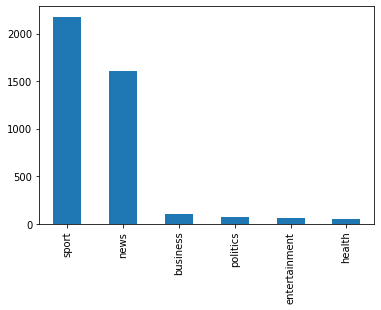

In [ ]:
dataset.Category.value_counts()[:15].plot(kind='bar');

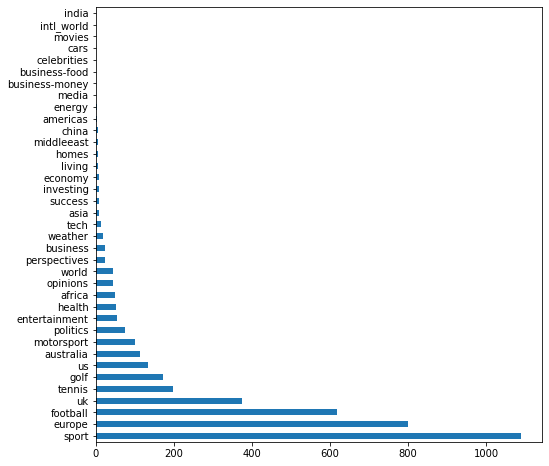

In [ ]:
dataset['Section'].value_counts().plot(kind='barh', figsize=(8, 8));

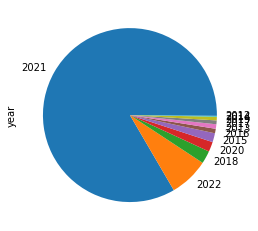

In [ ]:
dataset['year'].value_counts().plot(kind='pie');

In [ ]:
dataset = dataset[dataset.year != 2012]
dataset = dataset[dataset.year != 2013]
dataset = dataset[dataset.year != 2014]
dataset = dataset[dataset.year != 2015]
dataset = dataset[dataset.year != 2016]
dataset = dataset[dataset.year != 2017]
dataset = dataset[dataset.year != 2019]

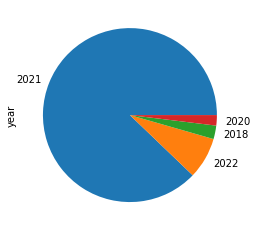

In [ ]:
dataset['year'].value_counts().plot(kind='pie');

In [ ]:
dataset.head(5)

,Index,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,Article text,year
0,0,"jacopo prisco,",2021-07-15,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,shortage truckers tusimple think solution driv...,e commerce boom exacerbate global truck driver...,"world, There's a shortage of truckers, but TuS...",shortage truckers tusimple think solution driv...,cnn right shortage truck drivers us worldwide ...,2021
1,2,"stephanie bailey,",2021-05-12,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,bioservo robotic ironhand could protect factor...,work factory mean task could lead chronic inju...,"world, Bioservo's robotic 'Ironhand' could pro...",robotic ironhand could protect factory workers...,cnn work factory warehouse mean task repetitio...,2021
2,3,"words stephanie bailey, video zahra jamshed",2021-06-16,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,swarm robots get smarter work cnn,hong kong warehouse swarm autonomous robots wo...,"asia, This swarm of robots gets smarter the mo...",swarm robots get smarter work,cnn hong kong warehouse swarm autonomous robot...,2021
3,4,"paul r la monica,",2022-03-15,business,investing,https://www.cnn.com/2022/03/15/investing/brics...,russia longer option investors emerge market cnn,many years world popular emerge market call br...,"investing, Russia is no longer an option for i...",russia longer option investors emerge market,new york cnn business many years world popular...,2022
4,7,reuters,2022-03-15,business,business,https://www.cnn.com/2022/03/15/business/russia...,russian energy investment ban part new eu sanc...,european union formally approve tuesday new ba...,"business, Russian energy investment ban part o...",eu ban investment russian energy new sanction ...,european union formally approve tuesday new ba...,2022


In [ ]:
print('Shape: ', dataset.shape)

Shape:  (3871, 12)


#Labeling

In [ ]:
# Category to number mapping
dataset['Category_code'] = dataset.Category
dataset['Category_code'] = dataset.Category.cat.codes

# Category to number mapping
dataset['Section_code'] = dataset.Section
dataset['Section_code'] = dataset.Section.cat.codes

#Split train/test

In [ ]:
# sklearn - library for machine learning
# train_test_split - Split arrays or metrics into random train and test subsets
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset['Article text'], 
                                                    dataset['Category_code'], 
                                                    test_size=0.20, 
                                                    random_state=8)

#Text Representation using TF-IDF Vectors as feature

In [ ]:
# TfidfVectorizer - Convert a collection of raw documents to a matrix of TF-IDF features
# Represent words as Vectors 
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Parameter election
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)

# Transform documents to a matrix in train
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)

# Transform documents to a matrix in test
features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

(3096, 300)
(775, 300)


#Model

In [ ]:
# sklearn - library for machine learning
# SVM - support-vector machines - supervised learning models for classification
from sklearn import svm

# sklearn.metrics -  for evaluating the quality of a model’s predictions
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# seaborn - library for statistical data visualization
import seaborn as sns

In [ ]:
# Default hyperparameters 
svc = svm.SVC(random_state=8)
print(svc.get_params())

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 8, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [ ]:
# Fit the random search model
svc.fit(features_train, labels_train)

SVC(random_state=8)

#Prediction

In [ ]:
# Find the prediction on the test
svc_predict = svc.predict(features_test)
print("Accuracy score on train: ", accuracy_score(labels_train, svc.predict(features_train)))

Accuracy score on train:  0.9899870801033591


In [ ]:
# Classification report
print("Classification report: ")
print(classification_report(labels_test, svc_predict))

Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.17      0.30        23
           1       1.00      0.23      0.38        13
           2       0.00      0.00      0.00         7
           3       0.87      0.99      0.93       295
           4       1.00      0.69      0.82        13
           5       0.98      0.98      0.98       424

    accuracy                           0.93       775
   macro avg       0.81      0.51      0.57       775
weighted avg       0.93      0.93      0.92       775



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


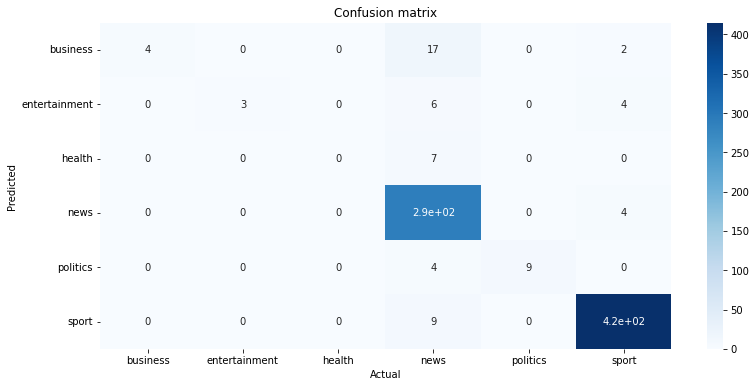

In [ ]:
# Confusion matrix - summary of prediction results on a classification problem
aux_df = dataset[['Category', 'Category_code']].drop_duplicates().sort_values('Category_code')
conf_matrix = confusion_matrix(labels_test, svc_predict)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()